In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import time
import numpy as np
import re

# Natural language processing toolkit
# To use this, run nltk.download() and download 'stopwords'
# from nltk.corpus import stopwords
# s=stopwords.words('english') + ['']

# Machine learning
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.cross_validation import train_test_split


# 2D data

/Users/emarti/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


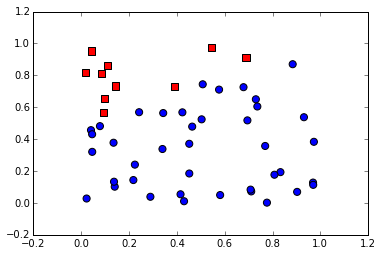

In [3]:
x1 = np.random.rand(50)
x2 = np.random.rand(50)
x = np.vstack((x1, x2)).T
y = -1*x[:,0] + 2*x[:,1] < 1

plt.scatter(x[:,0], x[:,1], c='b', marker='o', s=50*y)
plt.scatter(x[:,0], x[:,1], c='r', marker='s', s=50*(1-y))

In [4]:
clf = LinearSVC(C=1,penalty='l1',dual=False,fit_intercept=True)
clf.fit(x, y)

a0 = clf.intercept_[0]
a1 = clf.coef_[0,0]
a2 = clf.coef_[0,1]
print (a0, a1, a2)

(1.8941176943859008, 1.7687732927671784, -3.4643113531122598)


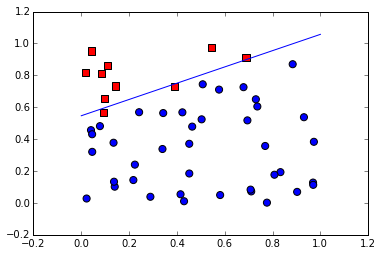

In [5]:
x1_line = np.linspace(0, 1)
x2_line = -(a0 + a1*x1_line) / a2
plt.plot(x1_line, x2_line)
plt.scatter(x[:,0], x[:,1], c='b', marker='o', s=50*y)
plt.scatter(x[:,0], x[:,1], c='r', marker='s', s=50*(1-y))

# 3D Data

/Users/emarti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/emarti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/emarti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


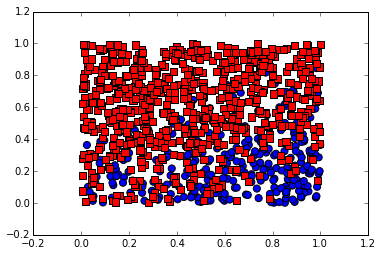

In [6]:
x1 = np.random.rand(1e3)
x2 = np.random.rand(1e3)
x3 = np.random.rand(1e3)
x = np.vstack((x1, x2, x3)).T
y = -1*x[:,0] + 2*x[:,1] + 2*x[:,2] < 1

plt.scatter(x[:,0], x[:,1], c='b', marker='o', s=50*y)
plt.scatter(x[:,0], x[:,1], c='r', marker='s', s=50*(1-y))

In [33]:
clf = LinearSVC(C=10,penalty='l1',dual=False,fit_intercept=True)
clf.fit(x, y)

clf_2d = LinearSVC(C=10,penalty='l1',dual=False,fit_intercept=True)
clf_2d.fit(x[:,0:2], y)

a0 = clf.intercept_[0]
a1 = clf.coef_[0,0]
a2 = clf.coef_[0,1]
print (a0, a1, a2)

a0_2d = clf_2d.intercept_[0]
a1_2d = clf_2d.coef_[0,0]
a2_2d = clf_2d.coef_[0,1]
print (a0_2d, a1_2d, a2_2d)

(11.107522797480522, 10.946981781854049, -22.176832555779843)
(0.085669755388700586, 1.0513073506774362, -2.2073531802729316)


In [34]:
print x.shape

(1000, 3)


In [35]:
# Since I'm contracting the 3rd dimension, I should add that amount.

a0b = a0 + clf.coef_[0,2] * (x[:,2].mean())
print a0b
print a0

0.253186370663
11.1075227975


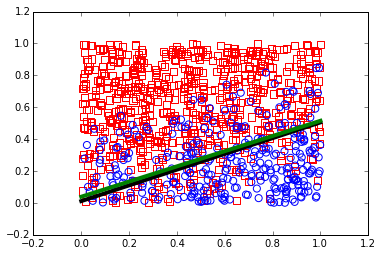

In [37]:
x1_line = np.linspace(0, 1)
x2_line = -(a0b + a1*x1_line) / a2

x2_line_2d = -(a0_2d + a1_2d*x1_line) / a2_2d

plt.scatter(x[y==0,0],
            x[y==0,1],
            edgecolor='r',
            facecolor='none',
            marker='s', s=50)
plt.scatter(x[y==1,0],
            x[y==1,1],
            edgecolor='b',
            facecolor='none',
            marker='o', s=50)


plt.plot(x1_line, x2_line, 'k', lw=4)
plt.plot(x1_line, x2_line_2d, 'g', lw=4)

In [10]:
print y.shape

(1000,)
